In [5]:
#**************************************Viral Vakani***************************************************
#Import Libraries
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import sys
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from collections import defaultdict

#Setting environment variables
#pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
sns.set_style("dark")
%matplotlib inline



In [15]:
#**************************************Viral Vakani***************************************************
#Reading Data
#Importing Data into Pandas DataFrame


df = pd.read_csv("raw_data/Traffic_Violations.csv")
df.count()

Date Of Stop               1018634
Time Of Stop               1018634
Agency                     1018634
SubAgency                  1018634
Description                1018625
Location                   1018632
Latitude                    933599
Longitude                   933599
Accident                   1018634
Belts                      1018634
Personal Injury            1018634
Property Damage            1018634
Fatal                      1018634
Commercial License         1018634
HAZMAT                     1018634
Commercial Vehicle         1018634
Alcohol                    1018634
Work Zone                  1018634
State                      1018575
VehicleType                1018634
Year                       1012208
Make                       1018586
Model                      1018465
Color                      1005043
Violation Type             1018634
Charge                     1018634
Article                     966569
Contributed To Accident    1018634
Race                

In [16]:
#**************************************Viral Vakani***************************************************
#Data Cleaning
#Drops the following columns. axis=1 denotes that these are columns not rows

df = df.drop(['Article', 'Agency', 'SubAgency', 'VehicleType', 'Make', 'Model', 'Color', 'Year', 'Geolocation', 'Latitude', 'Longitude', 'DL State', 'Driver City', 'Driver State'],axis=1)
df.head(5)

,Date Of Stop,Time Of Stop,Description,Location,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,...,Commercial Vehicle,Alcohol,Work Zone,State,Violation Type,Charge,Contributed To Accident,Race,Gender,Arrest Type
0,09/24/2013,17:11:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,No,No,No,No,No,No,...,No,No,No,MD,Citation,13-401(h),No,BLACK,M,A - Marked Patrol
1,12/20/2012,00:41:00,DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,No,No,No,No,No,No,...,No,No,No,MD,Citation,21-902(b1),No,WHITE,M,A - Marked Patrol
2,07/20/2012,23:12:00,FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,No,No,No,No,No,No,...,No,No,No,MD,Citation,21-707(a),No,ASIAN,F,A - Marked Patrol
3,03/19/2012,16:10:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,No,No,No,No,No,No,...,No,No,No,VA,Citation,21-1124.2(d2),No,HISPANIC,M,A - Marked Patrol
4,12/01/2014,12:52:00,FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,No,No,No,Yes,No,No,...,No,No,No,MD,Citation,21-403(b),No,BLACK,F,A - Marked Patrol


In [17]:
#**************************************Viral Vakani***************************************************
#Quick review of Data
#DataFrame Properties
#Clean Data of Nan/Null Values
#checking for missing values

print("Are there missing values? {}".format(df.isnull().any().any()))
#missing value control in features
X=df.isnull().sum()

#drop NaNs with 
df = df.dropna()
df.count()

Are there missing values? True


Date Of Stop               1018564
Time Of Stop               1018564
Description                1018564
Location                   1018564
Accident                   1018564
Belts                      1018564
Personal Injury            1018564
Property Damage            1018564
Fatal                      1018564
Commercial License         1018564
HAZMAT                     1018564
Commercial Vehicle         1018564
Alcohol                    1018564
Work Zone                  1018564
State                      1018564
Violation Type             1018564
Charge                     1018564
Contributed To Accident    1018564
Race                       1018564
Gender                     1018564
Arrest Type                1018564
dtype: int64

In [20]:
#**************************************Viral Vakani***************************************************
import calendar
d = dict(enumerate(calendar.month_abbr))

#Create new columns year and month - take year and month form Date of Stop and store it into new columns

df['year'] = pd.DatetimeIndex(df['Date Of Stop']).year
df['month'] = pd.DatetimeIndex(df['Date Of Stop']).month
df['month'] = df['month'].map(d)

#Create a new column - Weekday that records the day of the week on which the incident occured
df['Weekday'] = pd.to_datetime(df['Date Of Stop']).dt.weekday_name

df['timestamp'] = pd.to_datetime(df['Time Of Stop'])
df['minutes'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S')
df['Hour'] = df['Time Of Stop'].dt.hour


df.head(5)

,Date Of Stop,Time Of Stop,Description,Location,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,...,Contributed To Accident,Race,Gender,Arrest Type,year,month,Weekday,timestamp,minutes,Hour
0,09/24/2013,1900-01-01 17:11:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,No,No,No,No,No,No,...,No,BLACK,M,A - Marked Patrol,2013,Sep,Tuesday,1900-01-01 17:11:00,1031,17
1,12/20/2012,1900-01-01 00:41:00,DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,No,No,No,No,No,No,...,No,WHITE,M,A - Marked Patrol,2012,Dec,Thursday,1900-01-01 00:41:00,41,0
2,07/20/2012,1900-01-01 23:12:00,FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,No,No,No,No,No,No,...,No,ASIAN,F,A - Marked Patrol,2012,Jul,Friday,1900-01-01 23:12:00,1392,23
3,03/19/2012,1900-01-01 16:10:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,No,No,No,No,No,No,...,No,HISPANIC,M,A - Marked Patrol,2012,Mar,Monday,1900-01-01 16:10:00,970,16
4,12/01/2014,1900-01-01 12:52:00,FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,No,No,No,Yes,No,No,...,No,BLACK,F,A - Marked Patrol,2014,Dec,Monday,1900-01-01 12:52:00,772,12


In [22]:
#**************************************Viral Vakani***************************************************
#sort values of minutes column
minutes = df.minutes.sort_values()

In [23]:
#**************************************Viral Vakani***************************************************
#Total minutes in a day
total_minutes = 24 * 60

ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / df.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]
hcdf = np.arange(total_minutes) * (1 / total_minutes)

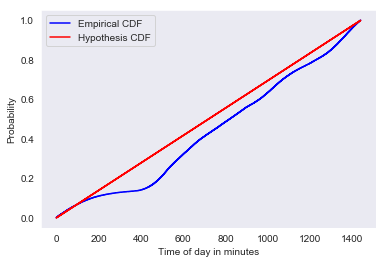

In [67]:
#**************************************Viral Vakani***************************************************
plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.savefig("ECDF_HCDF_Analysis1_Viral.png")

In [65]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.14745522416179785

In [66]:
#**************************************Viral Vakani***************************************************
# Since max diff between Empirical CDF and CDF of hypothesis is less that 0.15, we do not reject the null hypothesis
# K Test for Male
male = df[df.Gender == 'M']
male.shape

(681265, 27)

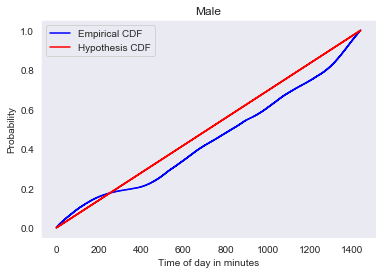

In [68]:
#**************************************Viral Vakani***************************************************
minutes = np.sort(male.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / male.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Male")
plt.savefig("ECDF_HCDF_Analysis_Male_Viral.png")

In [33]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.08955424121141398

In [31]:
#Since max diff between Empirical CDF and CDF of hypothesis is greater than 0.09, we can reject the null hypothesis, however it is not less than 0.05 
#K Test for Female
female = df[df.Gender == 'F']
female.shape

(336156, 27)

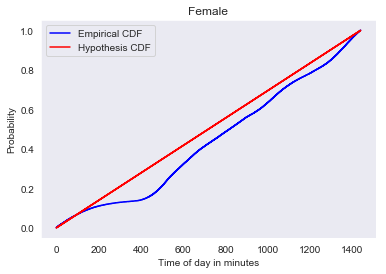

In [69]:
#**************************************Viral Vakani***************************************************
minutes = np.sort(female.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / female.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Female")
plt.savefig("ECDF_HCDF_Analysis_Female_Viral.png")

In [35]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.14745522416179785

In [36]:
#Since max diff between Empirical CDF and CDF of hypothesis is greater than 0.15, we reject the null hypothesis

In [37]:
#**************************************Viral Vakani***************************************************
#Gender Analysis
temp=df.pivot_table(values='Violation Type', index=df['year'], columns='Gender', aggfunc=np.size)
temp

Gender,F,M,U
year,,,
2012,49722,101263,317
2013,62873,127436,207
2014,75786,147682,249
2015,77979,157127,243
2016,69796,147757,127


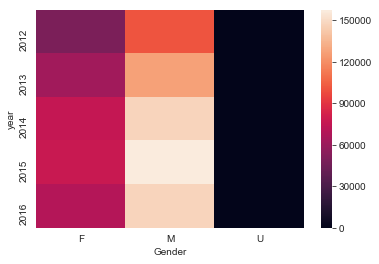

In [70]:
#**************************************Viral Vakani***************************************************
sns.heatmap(temp)
plt.savefig("GenderAnalysis_Heatmap_Viral.png")
plt.show()

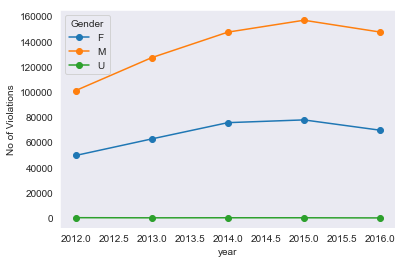

In [71]:
#**************************************Viral Vakani***************************************************
#Lets get a clear picture on Gender Analysis
df.groupby(['year', 'Gender'])['Violation Type'].count().unstack().plot(marker='o')
#plt.xticks('White', 'Black')
plt.ylabel('No of Violations')
plt.savefig("Gender_by_Year_Viral.png")

plt.show()

In [40]:
#**************************************Viral Vakani***************************************************
#Race Analysis
temp2=df.pivot_table(values='Violation Type', index=df['year'], columns='Race', aggfunc=np.size)
temp2


Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE
year,,,,,,
2012,8599,45690,27338,38,7556,62081
2013,11091,59935,37127,347,8885,73131
2014,13505,66967,44766,885,11722,85872
2015,13844,73457,51009,687,12357,83995
2016,12526,71204,50290,477,11993,71190


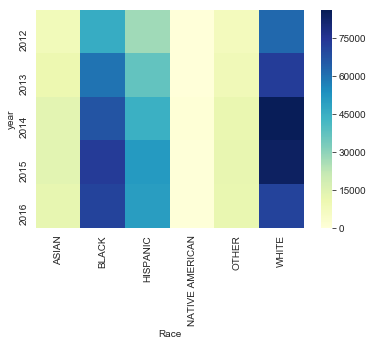

In [72]:
#**************************************Viral Vakani***************************************************
sns.heatmap(temp2, cmap="YlGnBu")
plt.savefig("RaceAnalysis_Heatmap_Viral.png")
plt.show()

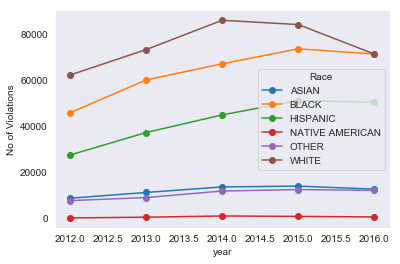

In [73]:
#**************************************Viral Vakani***************************************************
#Lets get a clear picture on Gender Analysis
df.groupby(['year', 'Race'])['Violation Type'].count().unstack().plot(marker='o')
plt.ylabel('No of Violations')
plt.savefig("Race_by_Year_Viral.png")
plt.show()

In [58]:
#**************************************Lissette***************************************************

date_df = df[['Date Of Stop', 'Time Of Stop','year', 'month', 'Hour']]
first = date_df.loc[date_df['year'] == 2012]
first_gf = first.groupby('month')
second = date_df.loc[date_df['year'] == 2013]
second_gf = second.groupby('month')
third = date_df.loc[date_df['year'] == 2014]
third_gf = third.groupby('month')
fourth = date_df.loc[date_df['year'] == 2015]
fourth_gf = fourth.groupby('month')
fifth = date_df.loc[date_df['year'] == 2016]
fifth_gf = fifth.groupby('month')
total_df = pd.DataFrame({'month': first_gf['month'].groups, 'Count_2012': first_gf['month'].count(), 
                         'Count_2013': second_gf['month'].count(), 'Count_2014': third_gf['month'].count(),
                        'Count_2015': fourth_gf['month'].count(), 'Count_2016': fifth_gf['month'].count()})

total_df = total_df.drop(['month'], axis=1, inplace=False)
total_df.reset_index(level=0, inplace=True)

#Simple code to see the min and max values by year
print(total_df.loc[total_df['Count_2012'].idxmax()][0])
print(total_df.loc[total_df['Count_2013'].idxmax()][0])
print(total_df.loc[total_df['Count_2014'].idxmax()][0])
print(total_df.loc[total_df['Count_2015'].idxmax()][0])
print(total_df.loc[total_df['Count_2016'].idxmax()][0])
print(total_df.loc[total_df['Count_2012'].idxmin()][0])
print(total_df.loc[total_df['Count_2013'].idxmin()][0])
print(total_df.loc[total_df['Count_2014'].idxmin()][0])
print(total_df.loc[total_df['Count_2015'].idxmin()][0])
print(total_df.loc[total_df['Count_2016'].idxmin()][0])



May
May
May
Apr
Mar
Jan
Feb
Jan
Feb
Dec


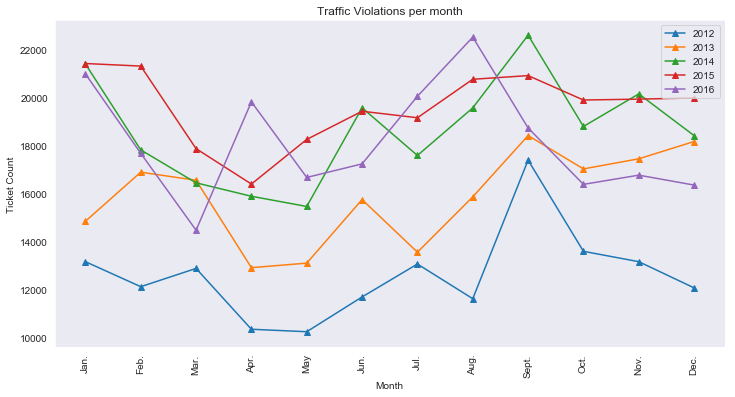

In [60]:
#**************************************Lissette***************************************************

# Set x axis to numerical value for month
x_axis_data = np.arange(1,13,1)
x_axis_data
plt.figure(figsize=(12, 6))

plt.plot(x_axis_data,total_df['Count_2012'].values, marker="^", label='2012')
plt.plot(x_axis_data,total_df['Count_2013'].values, marker="^", label='2013')
plt.plot(x_axis_data,total_df['Count_2014'].values, marker="^", label='2014')
plt.plot(x_axis_data,total_df['Count_2015'].values, marker="^", label='2015')
plt.plot(x_axis_data,total_df['Count_2016'].values, marker="^", label='2016')

months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

plt.xticks(np.arange(min(x_axis_data), max(x_axis_data)+1, 1.0), months, rotation="vertical" )
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.title("Traffic Violations per month")
plt.xlabel("Month")
plt.ylabel("Ticket Count")

plt.savefig("TrafficByMonth_Lissette.png", bbox_inches='tight')
plt.show()

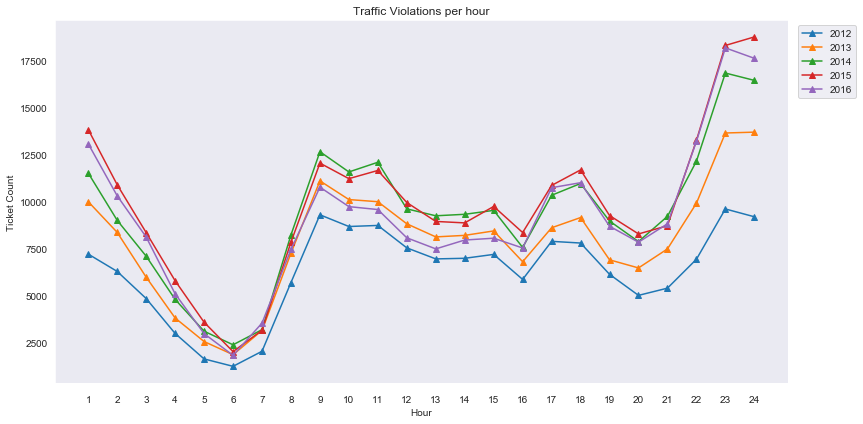

In [62]:
#**************************************Lissette***************************************************

hour_2012 = first.groupby('Hour')
hour_2013 = second.groupby('Hour')
hour_2014 = third.groupby('Hour')
hour_2015 = fourth.groupby('Hour')
hour_2016 = fifth.groupby('Hour')

time_df = pd.DataFrame({'Hour': hour_2012['Hour'].groups, 'Count_2012': hour_2012['Hour'].count(), 
                         'Count_2013': hour_2013['Hour'].count(), 'Count_2014': hour_2014['Hour'].count(),
                        'Count_2015': hour_2015['Hour'].count(), 'Count_2016': hour_2016['Hour'].count()})
time_df = time_df.drop(['Hour'], axis=1, inplace=False)
time_df.reset_index(level=0, inplace=True)
x_axis = np.arange(1,25,1)
plt.figure(figsize=(12, 6))
plt.plot(x_axis,time_df['Count_2012'].values, marker="^", label='2012')
plt.plot(x_axis,time_df['Count_2013'].values, marker="^", label='2013')
plt.plot(x_axis,time_df['Count_2014'].values, marker="^", label='2014')
plt.plot(x_axis,time_df['Count_2015'].values, marker="^", label='2015')
plt.plot(x_axis,time_df['Count_2016'].values, marker="^", label='2016')
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.tick_params(axis='x', which='major',length=4, pad=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.title("Traffic Violations per hour")
plt.xlabel("Hour")
plt.ylabel("Ticket Count")
plt.savefig("TrafficByHour_Lissette.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [63]:
#**************************************Lissette***************************************************

#code to see which times are busiest
print(time_df.loc[time_df['Count_2012'].idxmax()][0])
print(time_df.loc[time_df['Count_2013'].idxmax()][0])
print(time_df.loc[time_df['Count_2014'].idxmax()][0])
print(time_df.loc[time_df['Count_2015'].idxmax()][0])
print(time_df.loc[time_df['Count_2016'].idxmax()][0])
print(time_df.loc[time_df['Count_2012'].idxmin()][0])
print(time_df.loc[time_df['Count_2013'].idxmin()][0])
print(time_df.loc[time_df['Count_2014'].idxmin()][0])
print(time_df.loc[time_df['Count_2015'].idxmin()][0])
print(time_df.loc[time_df['Count_2016'].idxmin()][0])

22
23
22
23
22
5
5
5
5
5


In [43]:
#*********************************************Bhavesh***********************************************************************
df2 = pd.read_csv('raw_data/Traffic_Violations.csv')



df2 = df2['Description'].replace({'DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS':'FAILURE TO OBEY A TRAFFIC CONTROL DEVICE',
                                                                         'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER':'FAILURE TO DISPLAY REGISTRATION CARD',
                                                                         'DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION': 'SUSPENDED REGISTRATION',
                                                                         'FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND': 'FAILURE TO DISPLAY LICENSE',
                                                                         'DRIVER FAILURE TO STOP AT STOP SIGN LINE':'FAILURE TO STOP AT STOP SIGN',
                                                                         'DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE':'EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE',
                                                                         'DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION':'USE HANDHELD TELEPHONE WHILE MOTOR VEHICLE IS IN MOTION',
                                                                         'PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE':'SUSPENDED LICENSE',
                                                                         'OPERATOR NOT RESTRAINED BY SEATBELT':'OPERATOR NOT RESTRAINED BY SEATBELT',
                                                                         'EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH':'EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH'})

df2.head(5)

0                               SUSPENDED REGISTRATION
1                    DRIVING WHILE IMPAIRED BY ALCOHOL
2                         FAILURE TO STOP AT STOP SIGN
3    USE HANDHELD TELEPHONE WHILE MOTOR VEHICLE IS ...
4                   FAILURE STOP AND YIELD AT THRU HWY
Name: Description, dtype: object

In [ ]:
#*********************************************Bhavesh***********************************************************************
df2 = df2['Description'].value_counts(10)
print(stats_arrest)

#Number of Arrests
# stats_desc = df['Arrest Type'].value_counts()
# print(stats_arrest)

sns.set(rc={'figure.figsize':(18,8)})
sns.countplot(x=df2['Description'],data=df2,order=df2)
plt.xticks(rotation='vertical')
plt.ylabel('Number of crimes')
plt.savefig("Number_of_Arrests.png")
plt.show()




In [49]:
#**************************************Chris**************************************************
df['Description'].value_counts().nlargest(10)

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           79657
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   48699
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               37820
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            26694
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                             22667
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                            22627
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                         22237
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    21756
OPERATOR NOT RESTRAINED BY SEATBELT                                                                  18339
EXCEEDING THE POSTED SPEED LIMIT OF 3

In [50]:
#**************************************Chris**************************************************
df['Gender'].value_counts()

M    681265
F    336156
U      1143
Name: Gender, dtype: int64

In [51]:
#**************************************Chris**************************************************
#lets find the percentage
test=(df['Gender'].value_counts()/df['Gender'].count())*100
test.map("{:.2f}%".format)

M    66.88%
F    33.00%
U     0.11%
Name: Gender, dtype: object

In [52]:
#**************************************Chris**************************************************
#percentage of violations by race
r=(df.groupby('Race')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Race             Description                                                               
NATIVE AMERICAN  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    10.39%
WHITE            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     9.00%
ASIAN            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     8.82%
OTHER            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     8.62%
BLACK            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     6.96%
HISPANIC         DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     6.50%
ASIAN            FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER             5.77%
OTHER            FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER             5.14%
BLACK            FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER         

In [53]:
#**************************************Chris**************************************************
r=(df.groupby('Alcohol')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Alcohol  Description                                                                                      
Yes      PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    12.76%
No       DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            7.83%
Yes      DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 26-204                                                  6.91%
         DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 27-103                                                  6.45%
         POSSESSING SUSPENDED LIC.                                                                             5.50%
No       FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                    4.79%
Yes      DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 17-106                                                  4.29%
         DISPLAY SUSPENDED LIC.                                           

In [54]:
#**************************************Chris**************************************************
#Fatal percentage
r=(df.groupby('Fatal')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Fatal  Description                                                                                       
Yes    NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPRUDENT MANNER ENDANGERING PROPERTY, LIFE AND PERSON      9.86%
No     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            7.82%
       FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                    4.78%
       DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                3.71%
Yes    DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            3.29%
       DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT OF WAY TO VEHICLE APPROACHING FROM OPPOSITE DIRECTION    2.82%
       DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                2.82%
       FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO AVOID COLLISION                    